## Line plot

In [1]:
# Create a simple plot

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0, 2, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig,ax = plt.subplots()
ax.plot(t,s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
      title='About as simple as it gets, folks')
ax.grid()

fig.savefig('text.png')
plt.show()

## Multitple subplots in one figure
- subplot() : Multiple axes를 만들어주는 함수

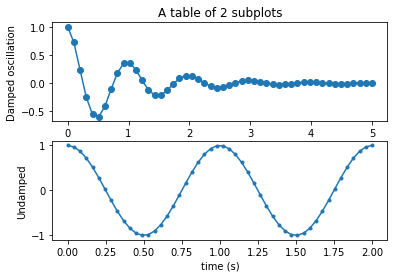

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(0,5)
x2 = np.linspace(0,2)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2,1,1)
plt.plot(x1,y1,'o-')
plt.title('A table of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(212)
plt.plot(x2,y2,'.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()
# 그림을 꺼내는 함수, 메모리에서?

## Images
- imshow() : Matplotlib can display images

In [3]:
# maplotlib에서 이미지를 표시하는 방법은 여러가지이지만 imshow()가 가장 많이 사용

import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch

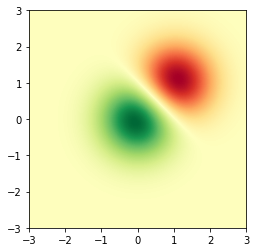

In [4]:
# a simple bivariate normal distribution
delta = 0.025
x = y = np.arange(-3,3,delta)
X,Y = np.meshgrid(x,y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X-1)**2 - (Y-1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
im = ax.imshow(Z,interpolation = 'bilinear', cmap = cm.RdYlGn,
              origin='lower', extent=[-3,3,-3,3],
              vmax=abs(Z).max(), vmin=-abs(Z).max())
plt.show()


## Histograms
- hist() : 히스토그램 반환
- bins를 설정
- normed flag상태에서 히스토그램은 확률밀도함수랑 비슷
- bar의 색 설정
- opacity 설정

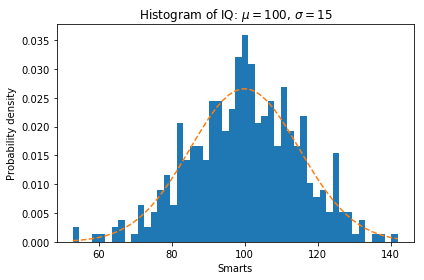

In [8]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

## Barchart
- bar() : bar chart를 만들어줌
- barchart는 빈도수나 오차가 포함된 요약통계를 보여줄 때 유용
- seaborn.barplot()

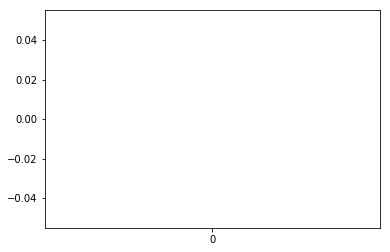

In [10]:
import seaborn as sns
#sns.barplot(data = data. x,y,hue = 구분지을 데이터)\


{'Pacer Test': Score(score='7', percentile=37.0), 'Flexed Arm\n Hang': Score(score='48', percentile=95.0), 'Mile Run': Score(score='12:52', percentile=73.0), 'Agility': Score(score='17', percentile=60.0), 'Push Ups': Score(score='14', percentile=16.0)}
Student(name='Johnny Doe', grade=2, gender='boy')


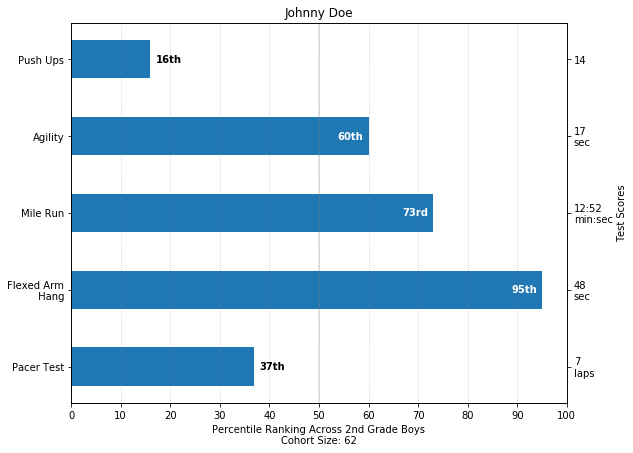

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

np.random.seed(42)

Student = namedtuple('Student', ['name', 'grade', 'gender'])
Score = namedtuple('Score', ['score', 'percentile'])

# GLOBAL CONSTANTS
testNames = ['Pacer Test', 'Flexed Arm\n Hang', 'Mile Run', 'Agility',
             'Push Ups']
testMeta = dict(zip(testNames, ['laps', 'sec', 'min:sec', 'sec', '']))


def attach_ordinal(num):
    """helper function to add ordinal string to integers

    1 -> 1st
    56 -> 56th
    """
    suffixes = {str(i): v
                for i, v in enumerate(['th', 'st', 'nd', 'rd', 'th',
                                       'th', 'th', 'th', 'th', 'th'])}

    v = str(num)
    # special case early teens
    if v in {'11', '12', '13'}:
        return v + 'th'
    return v + suffixes[v[-1]]


def format_score(scr, test):
    """
    Build up the score labels for the right Y-axis by first
    appending a carriage return to each string and then tacking on
    the appropriate meta information (i.e., 'laps' vs 'seconds'). We
    want the labels centered on the ticks, so if there is no meta
    info (like for pushups) then don't add the carriage return to
    the string
    """
    md = testMeta[test]
    if md:
        return '{0}\n{1}'.format(scr, md)
    else:
        return scr


def format_ycursor(y):
    y = int(y)
    if y < 0 or y >= len(testNames):
        return ''
    else:
        return testNames[y]


def plot_student_results(student, scores, cohort_size):
    #  create the figure
    fig, ax1 = plt.subplots(figsize=(9, 7))
    fig.subplots_adjust(left=0.115, right=0.88)
    fig.canvas.set_window_title('Eldorado K-8 Fitness Chart')

    pos = np.arange(len(testNames))

    rects = ax1.barh(pos, [scores[k].percentile for k in testNames],
                     align='center',
                     height=0.5,
                     tick_label=testNames)

    ax1.set_title(student.name)

    ax1.set_xlim([0, 100])
    ax1.xaxis.set_major_locator(MaxNLocator(11))
    ax1.xaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.25)

    # Plot a solid vertical gridline to highlight the median position
    ax1.axvline(50, color='grey', alpha=0.25)

    # Set the right-hand Y-axis ticks and labels
    ax2 = ax1.twinx()

    scoreLabels = [format_score(scores[k].score, k) for k in testNames]

    # set the tick locations
    ax2.set_yticks(pos)
    # make sure that the limits are set equally on both yaxis so the
    # ticks line up
    ax2.set_ylim(ax1.get_ylim())

    # set the tick labels
    ax2.set_yticklabels(scoreLabels)

    ax2.set_ylabel('Test Scores')

    xlabel = ('Percentile Ranking Across {grade} Grade {gender}s\n'
              'Cohort Size: {cohort_size}')
    ax1.set_xlabel(xlabel.format(grade=attach_ordinal(student.grade),
                                 gender=student.gender.title(),
                                 cohort_size=cohort_size))

    rect_labels = []
    # Lastly, write in the ranking inside each bar to aid in interpretation
    for rect in rects:
        # Rectangle widths are already integer-valued but are floating
        # type, so it helps to remove the trailing decimal point and 0 by
        # converting width to int type
        width = int(rect.get_width())

        rankStr = attach_ordinal(width)
        # The bars aren't wide enough to print the ranking inside
        if width < 40:
            # Shift the text to the right side of the right edge
            xloc = 5
            # Black against white background
            clr = 'black'
            align = 'left'
        else:
            # Shift the text to the left side of the right edge
            xloc = -5
            # White on magenta
            clr = 'white'
            align = 'right'

        # Center the text vertically in the bar
        yloc = rect.get_y() + rect.get_height() / 2
        label = ax1.annotate(rankStr, xy=(width, yloc), xytext=(xloc, 0),
                            textcoords="offset points",
                            ha=align, va='center',
                            color=clr, weight='bold', clip_on=True)
        rect_labels.append(label)

    # make the interactive mouse over give the bar title
    ax2.fmt_ydata = format_ycursor
    # return all of the artists created
    return {'fig': fig,
            'ax': ax1,
            'ax_right': ax2,
            'bars': rects,
            'perc_labels': rect_labels}


student = Student('Johnny Doe', 2, 'boy')
scores = dict(zip(testNames,
                  (Score(v, p) for v, p in
                   zip(['7', '48', '12:52', '17', '14'],
                       np.round(np.random.uniform(0, 1,
                                                  len(testNames)) * 100, 0)))))
cohort_size = 62  # The number of other 2nd grade boys
print(scores)
print(student)
arts = plot_student_results(student, scores, cohort_size)
plt.show()

## Scatter plot
- scatter(x,y)으로 산점도 그리기 가능

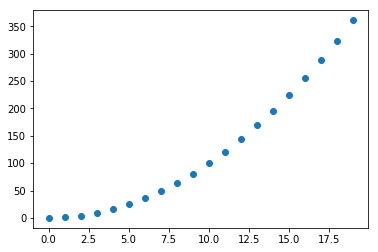

In [15]:
x = np.arange(20)
y = np.arange(20) **2

plt.figure()
plt.scatter(x,y)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\users\\stats\\anaconda33\\lib\\site-packages\\matplotlib\\mpl-data\\sample_data\\goog.npz'